In [86]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from utils import read_data
import seaborn as sns
import pandas as pd

In [87]:
modelNames = ["m2", "m4", "m8", "m16", "m32", "m64"]
modelName = "m16"
mode = "TRAIN"

In [88]:
if mode == "TRAIN":
    sourceFolder = "o7_analyze_train"
elif mode == "TEST":
    sourceFolder = "o7_analyze_test"
else:
    raise ValueError("Unknown mode")
sourceFolder = os.path.join(sourceFolder, modelName)

In [89]:
cwd = sys.path[0]
outputFolderPath = os.path.join(cwd, sourceFolder)
folderNames = os.listdir(outputFolderPath)

data = {}
for folderName in folderNames:
    folderPath = os.path.join(outputFolderPath, folderName)
    data_pickle, data_json = read_data(folderPath)

    # X_pred = data_pickle["X_pred"]
    # X_true = data_pickle["X_true"]
    # tArrayPred = data_pickle["tArrayPred"]
    # mseArray = data_pickle["mseArray"]
    # dx = data_json["s2"]["dx"]
    # L = data_json["s2"]["L"]

    mseArray = data_pickle["mseArray"]
    data[folderName] = mseArray

tArrayPred = data_pickle["tArrayPred"]
df = pd.DataFrame(data=data, index=tArrayPred)

In [90]:
# df.iloc[-1,:].describe()
df["mean"] = df.apply(lambda row: row.describe()["mean"], axis=1)
df["std"] = df.apply(lambda row: row.describe()["std"], axis=1)

In [91]:
df.tail()

,2024-01-05-06-02-14,2024-01-05-06-02-16,2024-01-05-06-02-17,2024-01-05-06-02-15,mean,std
784.0,0.000049,0.006831,0.000102,0.000044,0.001756,0.00293
788.0,0.000049,0.006831,0.000103,0.000044,0.001757,0.00293
792.0,0.000049,0.006832,0.000103,0.000045,0.001757,0.00293
796.0,0.000049,0.006832,0.000103,0.000045,0.001757,0.00293
800.0,0.000049,0.006833,0.000103,0.000045,0.001758,0.00293


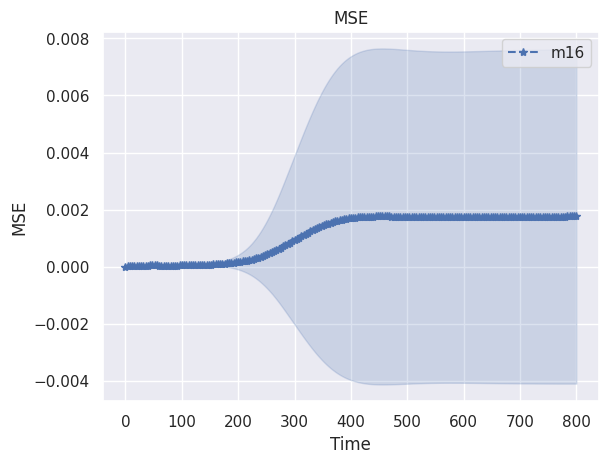

In [92]:
sns.set_theme()
fig, ax = plt.subplots()

xp = df.index.values
yp = df['mean'].values
err = df['std'] * 2  #95% https://seaborn.pydata.org/tutorial/error_bars.html

ax.plot(xp, yp, "--*", label=modelName)
ax.fill_between(xp, yp + err, yp - err, color='b', alpha=0.2)
ax.set_title(r"MSE")
ax.set_xlabel("Time")
ax.set_ylabel("MSE")

plt.legend()